# Chapter 3. Lazy Learning – Classification Using Nearest Neighbors

## Understanding nearest neighbor classification

Nearest neighbor classifiers are defined by their characteristic of classifying unlabeled examples by assigning them the class of similar labeled examples. Despite the simplicity of this idea, nearest neighbor methods are extremely powerful.

It is useful for:
- Computer vision applications, including optical character recognition and facial recognition in both still images and video
- Predicting whether a person will enjoy a movie or music recommendation
- Identifying patterns in genetic data, perhaps to use them in detecting specific proteins or diseases

The strengths and weaknesses of the KNN algorithm 

**Strengths**
- Simple and effective
- Makes no assumptions about the underlying data distribution
- Fast training phase

**Weaknesses**
- Does not produce a model, limiting the ability to understand how the features are related to the class
- Requires selection of an appropriate k
- Slow classification phase
- Categorical features and missing data require additional processing
- The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.


The k-NN algorithm gets its name from the fact that it uses information about an example's k-nearest neighbors to classify unlabeled examples. The letter k is a variable term implying that any number of nearest neighbors could be used. After choosing k, the algorithm requires a training dataset made up of examples that have been classified into several categories, as labeled by a nominal variable. Then, for each unlabeled record in the test dataset, k-NN identifies k records in the training data that are the "nearest" in similarity. The unlabeled test instance is assigned the class of the majority of the k nearest neighbors.

A example
Dataset to rate food with two features: 
- how crunchy and how sweet from 0-10
- labels: fruits, vegetables, or proteins

| Ingredient | Sweetness | Crunchiness | food type |
|------------|-----------|-------------|-----------|
| apple      | 10        | 9           | fruit     |
| bacon      | 1         | 4           | protein   |
| banana     | 10        | 1           | fruit     |
| carrot     | 7         | 10          | vegetable |
| celery     | 3         | 10          | vegetable |
| cheese     | 1         | 1           | protein   |

The k-NN algorithm treats the features as coordinates in a multidimensional feature space. As our dataset includes only two features, the feature space is two-dimensional. We can plot two-dimensional data on a scatter plot

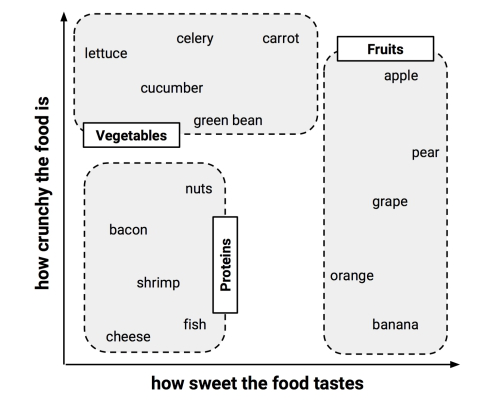

In [2]:
from PIL import Image 
myImage1 = Image.open("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch3_KNN/plot.jpg")
display(myImage1)

Similar types of food tend to be grouped closely together. As illustrated in the diagram, vegetables tend to be crunchy but not sweet, fruits tend to be sweet and either crunchy or not crunchy, while proteins tend to be neither crunchy nor sweet

Is tomato a fruit or vegetable? 

We can use the nearest neighbor approach to determine which class is a better fit.

### Measuring similarity with distance 

Traditionally, the k-NN algorithm uses **Euclidean distance**, which is the distance one would measure if it were possible to use a ruler to connect two points,

Euclidean distance is specified by the following formula, where p and q are the examples to be compared, each having n features. The term p1 refers to the value of the first feature of example p, while q1 refers to the value of the first feature of example q:

$dis(p,q)=\sqrt{(p_{1}-q_{1})^2+(p_{2}-q_{2})^2...+(p_{n}-q_{n})^2}$

For example, to calculate the distance between the tomato (sweetness = 6, crunchiness = 4), and the green bean (sweetness = 3, crunchiness = 7), we can use the formula as follows:

$dis(tomato,green bean)=\sqrt{(6-3)^2+(4-7)^2=4.2}$

In a similar vein, we can calculate the distance between the tomato and several of its closest neighbors as follows:

| Ingredient | Sweetness | Crunchiness | food type | Distance -> tomato                |
|------------|-----------|-------------|-----------|-----------------------------------|
| grape      | 8         | 5           | fruit     | sqrt((6 - 8)^2 + (4 - 5)^2) = 2.2 |
| green bean | 3         | 7           | vegetable | sqrt((6 - 3)^2 + (4 - 7)^2) = 4.2 |
| nuts       | 3         | 6           | protein   | sqrt((6 - 3)^2 + (4 - 6)^2) = 3.6 |
| orange     | 7         | 3           | fruit     | sqrt((6 - 7)^2 + (4 - 3)^2) = 1.4 |

This is called 1-NN classification because k = 1. The orange is the nearest neighbor to the tomato, with a distance of 1.4. As orange is a fruit, the 1-NN algorithm would classify tomato as a fruit.

If we use the k-NN algorithm with k = 3 instead, it performs a vote among the three nearest neighbors: orange, grape, and nuts. Since the majority class among these neighbors is fruit (two of the three votes), the tomato again is classified as a fruit.

### Choosing an appropriate K 

The decision of how many neighbors to use for k-NN determines how well the model will generalize to future data. The balance between overfitting and underfitting the training data is a problem known as bias-variance tradeoff. Choosing a large k reduces the impact or variance caused by noisy data, but can bias the learner so that it runs the risk of ignoring small, but important patterns.

Suppose we took the extreme stance of setting a very large k, as large as the total number of observations in the training data. With every training instance represented in the final vote, the most common class always has a majority of the voters. The model would consequently always predict the majority class, regardless of the nearest neighbors.

On the opposite extreme, using a single nearest neighbor allows the noisy data or outliers to unduly influence the classification of examples. For example, suppose some of the training examples were accidentally mislabeled. Any unlabeled example that happens to be nearest to the incorrectly labeled neighbor will be predicted to have the incorrect class, even if nine other nearest neighbors would have voted differently.

Obviously, the best k value is somewhere between these two extremes.

One common practice is to begin with k equal to **the square root of the number of training examples**. In the food classifier we developed previously, we might set k = 4 because there were 15 example ingredients in the training data and the square root of 15 is 3.87.

However, such rules may not always result in the single best k. An alternative approach is to test several k values on a variety of test datasets and choose the one that delivers the best classification performance. That said, unless the data is very noisy, a large training dataset can make the choice of k less important. This is because even subtle concepts will have a sufficiently large pool of examples to vote as nearest neighbors.

A less common, but interesting solution to this problem is to choose a larger k, but apply a **weighted** voting process in which the vote of the closer neighbors is considered more authoritative than the vote of the far away neighbors. Many k-NN implementations offer this option.

### Data preparing for KNN

Features are typically transformed to a standard range prior to applying the k-NN algorithm. Suppose we added an additional feature to the dataset for a food's spiciness, which was measured using the Scoville scale, fro 0 to a million. The difference in scale allows the spice level to impact the distance function much more than the other two factors. Without adjusting our data, we might find that our distance measures only differentiate foods by their spiciness; the impact of crunchiness and sweetness would be dwarfed by the contribution of spiciness.

The traditional method of rescaling features for k-NN is min-max normalization. This process transforms a feature such that all of its values fall in a range between 0 and 1. 

$X_{new}=\frac{X-min(X)}{max(X)-min(X))}$

Another common transformation is called z-score standardization

$X_{new}=\frac{X-\mu}{\sigma}=\frac{X-Mean(X)}{SD(X)}$

For nominal data, use dummy coding: male=0; female=1

Classification algorithms based on the nearest neighbor methods are considered lazy learning algorithms.Under the strict definition of learning, a lazy learner is not really learning anything.The downside is that the process of making predictions tends to be relatively slow in comparison to training. Due to the heavy reliance on the training instances rather than an abstracted model, lazy learning is also known as **instance-based learning** or **rote learning**.

As instance-based learners do not build a model, the method is said to be in a class of non-parametric learning methods—no parameters are learned about the data. Without generating theories about the underlying data, non-parametric methods limit our ability to understand how the classifier is using the data. On the other hand, this allows the learner to find natural patterns rather than trying to fit the data into a preconceived and potentially biased functional form.

### Code example-mnist handwritten digit

The data file training.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (training.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.


#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the dataset

In [10]:
data=pd.read_csv("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch3_KNN/training.csv")

In [11]:
data.shape

(21000, 785)

In [12]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Split the data into labels and features
x is the 784 pixels

y is the label

print to see if the data are split correctly.

In [13]:
x=data.iloc[:,1:(data.shape[1])].values
y=data.iloc[:,0].values
print(x.shape)
print(y.shape)

(21000, 784)
(21000,)


### Showing the Images and the Labels (Digits Dataset)

This section is really just to show what the images and labels look like. let's see the first 5 numbers.

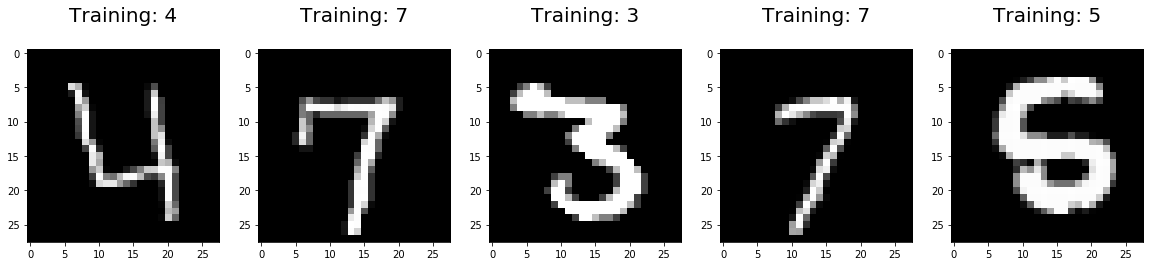

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[0:5], y[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Split the data into training set and testing set into 80% training data and 20% testing data.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)


Normally, it is always a good practice to scale the features so that all of them can be uniformly evaluated. In terms of this data set, all pixels are within same range. Just to show how to do normalization with sklearn.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Training and Predictions

We don't know what is a good k, Let start with 45.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=45)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=45, p=2,
           weights='uniform')

In [207]:
y_pred = classifier.predict(X_test)

#### Evaluating the performance

In [208]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[396   2   0   1   1   1   4   0   1   0]
 [  0 457   1   2   1   1   2   0   0   0]
 [  8  28 348  20   8   1   6  13   8   2]
 [  1   8   3 383   0   7   2   4   4   4]
 [  2  16   4   1 393   3   3   0   0  18]
 [  8  11   0  24   3 318  14   2   5   8]
 [  8   6   4   0   2   6 357   0   1   0]
 [  2  12   0   1   3   0   0 383   0  40]
 [ 10  25   1  12   4  15   1   2 327   4]
 [  2   3   0  11  13   1   0  19   1 363]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       406
           1       0.80      0.98      0.89       464
           2       0.96      0.79      0.87       442
           3       0.84      0.92      0.88       416
           4       0.92      0.89      0.91       440
           5       0.90      0.81      0.85       393
           6       0.92      0.93      0.92       384
           7       0.91      0.87      0.89       441
           8       0.94      0.82      0.87       401
           9       0.83     

#### Tuning hyperparameter

There is no way to know beforehand which value of K that yields the best results in the first go. One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 10 and 45.

In [82]:
error=[]
for i in range(1, 30, 3):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [83]:
error

[0.06904761904761905,
 0.07119047619047619,
 0.06428571428571428,
 0.0680952380952381,
 0.07238095238095238,
 0.07571428571428572,
 0.07904761904761905,
 0.07928571428571428,
 0.08119047619047619,
 0.08214285714285714]

Text(0, 0.5, 'Mean error')

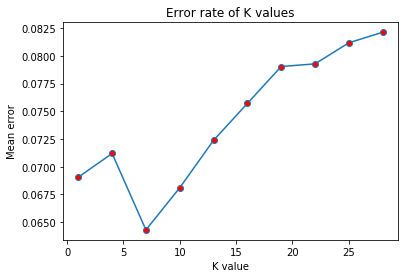

In [84]:
plt.plot(range(1, 30, 3), error, marker="o", markerfacecolor= "red")
plt.title("Error rate of K values")
plt.xlabel("K value")
plt.ylabel("Mean error")

#### Cross-Validation for Classification

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set. This can be seen in the graph below.

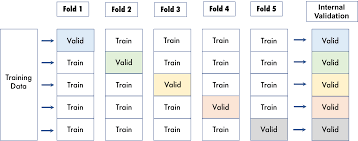

In [105]:
from PIL import Image 
myImage2 = Image.open("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch3_KNN/cvalid.png")
display(myImage2)

In [106]:
from sklearn.model_selection import cross_val_score
k_score=[]
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    k_score.append(np.mean(scores))


Text(0, 0.5, 'Cross-Validated Accuracy')

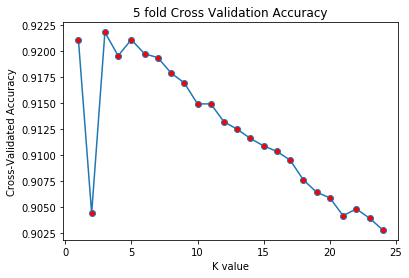

In [107]:
plt.plot(range(1,25), k_score, marker="o", markerfacecolor= "red")
plt.title("5 fold Cross Validation Accuracy")
plt.xlabel("K value")
plt.ylabel("Cross-Validated Accuracy")

In [152]:
k_score_10cv=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores_10cv = cross_val_score(knn, x, y, cv=8, scoring='accuracy')
    k_score_10cv.append(np.mean(scores_10cv))


Text(0, 0.5, 'Cross-Validated Accuracy')

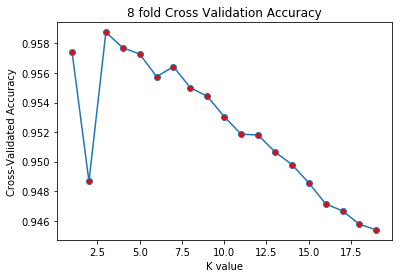

In [210]:
plt.plot(range(1,20), k_score_10cv, marker="o", markerfacecolor= "red")
plt.title("8 fold Cross Validation Accuracy")
plt.xlabel("K value")
plt.ylabel("Cross-Validated Accuracy")

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn_3n = KNeighborsClassifier(n_neighbors = 3)
scores_3n = cross_val_score(knn_3n, X_train, y_train, cv=5, scoring='accuracy')
knn_3n.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[421   0   1   0   0   2   2   0   1   2]
 [  0 433   2   0   0   0   3   0   0   0]
 [  8  34 344  16   4   0   3  10   9   1]
 [  2  12   6 403   1  10   0   5   8   3]
 [  0   7   3   0 384   2   2   2   0  20]
 [  2   4   1  15   1 328   9   2   3  11]
 [ 12   2   1   0   2   6 404   0   3   0]
 [  1  17   2   0   3   1   0 388   1  28]
 [  6  20   2  17   2  19   0   0 319  11]
 [  5   4   0   6   9   2   0  21   2 342]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       429
           1       0.81      0.99      0.89       438
           2       0.95      0.80      0.87       429
           3       0.88      0.90      0.89       450
           4       0.95      0.91      0.93       420
           5       0.89      0.87      0.88       376
           6       0.96      0.94      0.95       430
           7       0.91      0.88      0.89       441
           8       0.92      0.81      0.86       396
           9       0.82     